In [1]:
import pysplit
import pandas as pd
working_dir = r'C:/hysplit4/working'
storage_dir = r'C:/Users/sethl/OneDrive/Desktop/data/storage'
meteo_dir = r'C:/Users/sethl/OneDrive/Desktop/data/hysplit data'


In [2]:
basename = 'seth'
years = [2023]
months = [1]
hours = [11,12,13,14,15,16]
altitudes = [130,135,133]
location = (32.71568066666667, -96.74800683333333)
runtime = -24

In [8]:
pysplit.generate_bulktraj(basename, working_dir, storage_dir, meteo_dir,
                          years, months, hours, altitudes, location, runtime,
                          monthslice=slice(0, 32, 2), get_reverse=True,
                          get_clipped=True)

TypeError: unhashable type: 'Series'

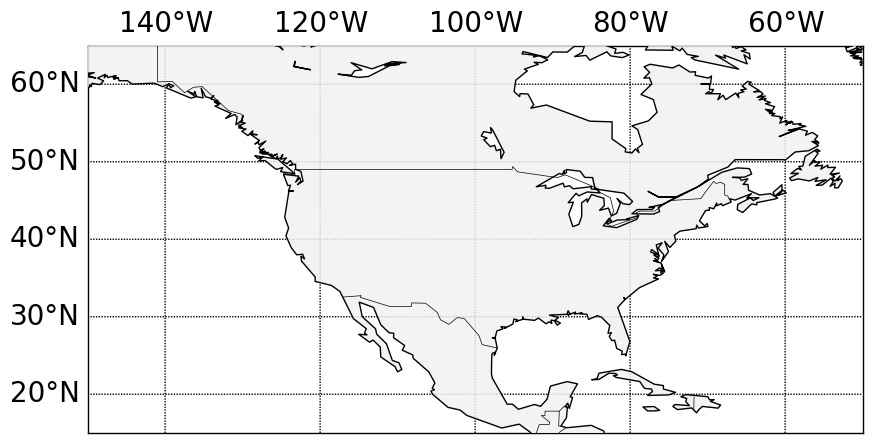

In [29]:
"""
=============================================
Basic Trajectory Plotting and Using MapDesign
=============================================

How to quickly initialize a matplotlib Basemap with the ``MapDesign``
class and plot ``Trajectory`` paths.

For this example we'll initialize only the January trajectories created in
``bulk_trajgen_example.py``.

"""
import pysplit

trajgroup = pysplit.make_trajectorygroup(r'C:/Users/sethl/OneDrive/Desktop/data/storage/*jan*')

"""
Basemaps and MapDesign
----------------------
PySPLIT's ``MapDesign`` class uses the matplotlib Basemap toolkit to quickly
set up attractive maps.  The user is not restricted to using maps
produced from ``MapDesign``, however- any Basemap will serve in the section
below entitled 'Plotting ``Trajectory`` Paths.

Creating a basic cylindrical map using ``MapDesign``  only requires
``mapcorners``, a list of the lower-left longitude, lower-left latitude,
upper-right longitude, and upper-right latitude values.
The ``standard_pm``, a list of standard parallels and meridians,
may be passed as ``None``.

"""
mapcorners =  [-150, 15, -50, 65]
standard_pm = None

bmap_params = pysplit.MapDesign(mapcorners, standard_pm)

"""
Once the ``MapDesign`` is initialized it can be used to draw a map:

"""
bmap = bmap_params.make_basemap()

"""
Plotting ``Trajectory`` Paths
-----------------------------
For this example, we will color-code by initialization (t=0) altitude,
(500, 1000, or 1500 m), which can be accessed via ``Trajectory.data.geometry``,
 a ``GeoSeries`` of Shapely ``Point`` objects.

We can store the trajectory color in ``Trajectory.trajcolor`` for convenience.

"""
color_dict = {130 : 'blue',
              135 : 'orange',
              133 : 'black'}

for traj in trajgroup:
    altitude0 = traj.data.geometry.apply(lambda p: p.z)[0]
    traj.trajcolor = color_dict[altitude0]

"""
For display purposes, let's plot only every fifth ``Trajectory``.  The lats,
lons are obtained by unpacking the ``Trajectory.Path``
(Shapely ``LineString``) xy coordinates.

"""
for traj in trajgroup[::5]:
     bmap.plot(*traj.path.xy, c=traj.trajcolor, latlon=True, zorder=20)

Timestep
 0.0    130.0
-0.0    129.9
-0.0    129.8
Name: geometry, dtype: float64
Timestep
 0.0    133.0
-0.0    132.9
-0.0    132.8
Name: geometry, dtype: float64
Timestep
 0.0    135.0
-0.0    134.9
-0.0    134.8
Name: geometry, dtype: float64
Timestep
 0.0    130.0
-0.0    129.9
-0.0    129.8
Name: geometry, dtype: float64
Timestep
 0.0    133.0
-0.0    132.9
-0.0    132.8
Name: geometry, dtype: float64
Timestep
 0.0    135.0
-0.0    134.9
-0.0    134.8
Name: geometry, dtype: float64
Timestep
 0.0    130.0
-0.0    129.9
-0.0    129.8
Name: geometry, dtype: float64
Timestep
 0.0    133.0
-0.0    132.9
-0.0    132.8
Name: geometry, dtype: float64
Timestep
 0.0    135.0
-0.0    134.9
-0.0    134.8
Name: geometry, dtype: float64
Timestep
 0.0    130.0
-0.0    129.9
-0.0    129.8
Name: geometry, dtype: float64
Timestep
 0.0    133.0
-0.0    132.9
-0.0    132.8
Name: geometry, dtype: float64
Timestep
 0.0    135.0
-0.0    134.9
-0.0    134.8
Name: geometry, dtype: float64
Timestep
 0.0   

In [13]:
for traj in trajgroup[::5]:
    df = pd.DataFrame(traj.data)

df

,Timestep,Pressure,Potential_Temperature,Temperature,Rainfall,Mixing_Depth,Relative_Humidity,Specific_Humidity,Mixing_Ratio,Terrain_Altitude,Solar_Radiation,geometry,DateTime,Temperature_C
Timestep,,,,,,,,,,,,,,
0.0,0.0,992.4,270.1,269.6,0.1,508.4,74.7,2.2,2.2,160.4,18.6,POINT Z (-96.74800 32.71600 130.00000),2023-01-31 16:00:00,-3.55
-0.0,-0.0,992.4,270.1,269.5,0.1,508.8,74.6,2.2,2.2,160.3,18.6,POINT Z (-96.74800 32.72000 130.30000),2023-01-31 15:59:00,-3.65
-0.0,-0.0,992.4,270.1,269.5,0.1,508.9,74.6,2.2,2.2,160.2,18.5,POINT Z (-96.74900 32.72400 130.50000),2023-01-31 15:58:00,-3.65
-0.1,-0.1,992.4,270.1,269.5,0.1,509.0,74.6,2.2,2.2,160.1,18.3,POINT Z (-96.74900 32.72800 130.80000),2023-01-31 15:57:00,-3.65
-0.1,-0.1,992.4,270.1,269.5,0.1,509.0,74.5,2.2,2.2,160.0,18.1,POINT Z (-96.74900 32.73200 131.10000),2023-01-31 15:56:00,-3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-23.9,-23.9,971.8,264.0,261.8,0.0,778.6,60.5,1.0,1.0,251.4,107.5,POINT Z (-94.21400 38.44300 224.80000),2023-01-30 16:04:00,-11.35
-24.0,-24.0,971.8,263.9,261.8,0.0,777.5,60.6,1.0,1.0,251.5,106.5,POINT Z (-94.21200 38.44600 224.80000),2023-01-30 16:03:00,-11.35
-24.0,-24.0,971.8,263.9,261.8,0.0,776.4,60.6,1.0,1.0,251.6,105.4,POINT Z (-94.21000 38.44900 224.70000),2023-01-30 16:02:00,-11.35


In order to generate Temperature, Rainfall, Humidity, etc:
1. Rename the 'hysplit4' file to 'hysplit'
2. Open up the hysplit gui and go to the advanced tab and then under configuration setup, click on trajectory
3. Click on add meteorological output, then check off every variable.
4. Click on save.

In order to generate Hysplit Trajectory Data every minute:
1. Rename the 'hysplit4' file to 'hysplit'
2. Open up the hysplit gui and go to the advanced tab and then under configuration setup, click on trajectory
3. Click on TRAJECTORY POINTS OUTPUT FREQUENCY
4. Change the endpoint write interval to one minute.
5. Click Save

In [11]:
df.to_csv('traj_data.csv')

In [12]:

for traj in trajgroup:
    altitude0 = traj.data.geometry.apply(lambda p: p.z)[0]
    print(traj.data.geometry)
    #traj.trajcolor = color_dict[altitude0]

Timestep
 0.0       POINT Z (-96.74800 32.71600 130.00000)
-0.0       POINT Z (-96.75100 32.71100 129.90000)
-0.0       POINT Z (-96.75400 32.70600 129.80000)
-0.1       POINT Z (-96.75800 32.70200 129.70000)
-0.1       POINT Z (-96.76100 32.69700 129.60000)
                           ...                   
-23.9    POINT Z (-103.34400 27.68500 1354.30000)
-24.0    POINT Z (-103.34900 27.68500 1355.20000)
-24.0    POINT Z (-103.35500 27.68400 1356.00000)
-24.0    POINT Z (-103.36100 27.68400 1356.80000)
-24.0    POINT Z (-103.36600 27.68300 1357.70000)
Name: geometry, Length: 1441, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 133.00000)
-0.0       POINT Z (-96.75100 32.71100 132.90000)
-0.0       POINT Z (-96.75500 32.70600 132.80000)
-0.1       POINT Z (-96.75800 32.70200 132.70000)
-0.1       POINT Z (-96.76100 32.69700 132.60000)
                           ...                   
-23.9    POINT Z (-103.44700 27.73900 1397.00000)
-24.0    POINT Z (-103.45300 27.7380

In [29]:
for traj in trajgroup[::5]:
    bmap.plot(*traj.path.xy, c=traj.trajcolor, latlon=True, zorder=20)